<a href="https://colab.research.google.com/github/ghatanisuresh/DataScience_tutorial/blob/main/CorrelationAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Correlation


In [4]:
import pandas as pd

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

df = pd.read_csv(path)
df

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
...,...
392,27.0 4 140.0 86.00 2790. 15...
393,44.0 4 97.00 52.00 2130. 24...
394,32.0 4 135.0 84.00 2295. 11...
395,28.0 4 120.0 79.00 2625. 18...


The above data is not clear and inproper format. So let make this as proper format.


In [39]:
mpg = pd.read_csv(path, delim_whitespace= True, header = None)
mpg

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


The dataset  is from the UCI Machine Learning Repository for auto-mpg data. You’re right you saw that there are no columnsnames loaded by default since the header=None argument was used. To properly label the columns, we can refer to the documentation for this dataset.

Here are the typical columns/attributes for this dataset:

__mpg__: Miles per gallon (continuous)

__cylinders__: Number of cylinders (multi-valued discrete)

__displacement__: Engine displacement (continuous)

__horsepower__: Engine horsepower (continuous)

__weight__: Vehicle weight in pounds (continuous)

__acceleration__: Time to accelerate from 0 to 60 mph (continuous)

__model year__: The year the car was manufactured (multi-valued discrete)

__origin__: Origin of the car (multi-valued discrete)

__car name__: Name of the car (string)

To add these columns in our DataFrame, we can load dataset with  code as follows:

In [40]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
mpg_df = pd.read_csv(path, delim_whitespace = True, header = None, names = columns)
mpg_df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


Checking Correlation

In [12]:
mpg_df['mpg'].corr(mpg_df['weight'])

-0.8317409332443352

In [15]:
mpg_df['cylinders'].corr(mpg_df['weight'])

0.8960167954533942

* Correlation between car's weight and weigth.

The output of -0.8317 suggests that there is a strong negative correlation between a car's weight and its fuel efficiency (mpg). This means that as the weight of the car increases, the fuel efficiency tends to decrease.


* Correlation between cylinders and weight.

The output of 0.8960 indicates a strong positive correlation between the number of cylinders and the weight of the car. This suggests that cars with more cylinders tend to be heavier.

In [61]:
# check the correlation on the dataframe after removing unwanted columns
new_df = mpg_df.drop(['model year', 'origin', 'car name'], axis = 1)
new_df

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6
394,44.0,4,97.0,52.00,2130.0,24.6
395,32.0,4,135.0,84.00,2295.0,11.6
396,28.0,4,120.0,79.00,2625.0,18.6


In [42]:
new_df.corr()


ValueError: could not convert string to float: '?'

As in our dataset:

* Error occured: ValueError: could not convert string to float: '?'

* it indicates thare are 'string '?' exisist in the dataset, which is string type and can't convert to float.

So we need to convert them into proper format.

Let's check how many of such values exisited in the dataset.

In [62]:
columns_with_question_mark = (mpg_df == '?').sum()
columns_with_question_mark

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


The output you're seeing indicates that the column horsepower contains 6 occurrences of the '?' character, which is likely representing missing or invalid data in this column.

In [63]:
# check the data type of horsepower

new_df['horsepower'].dtype

dtype('O')

dtype('O'): The 'O' stands for "object" type in pandas. This means that the horsepower column is currently being treated as a string or mixed type (instead of numeric like int or float).

In [64]:
# deal with above '?' occurences

new_df = new_df.replace('?', pd.NA)

In [65]:
# convert into nmeric type first.

new_df['horsepower'] = pd.to_numeric(new_df['horsepower'], errors = 'coerce')

In [66]:
new_df['horsepower'].dtype

dtype('float64')

The above null values are still not relevant for checking the correlation and should be thus handled.


__Handle the missing values:__

Either fill these missing values with the mean, median, or another appropriate value, or drop the rows with missing data.

# fill with mean value
new_df['horsepower'] = pd.to_numeric(new_df['horsepower'], errors='coerce') # Ensure all values are numeric
new_df['horsepower'] = new_df['horsepower'].fillna(new_df['horsepower'].mean()) # Fill NaN with mean


In [67]:
#fill value with mean method

new_df['horsepower'] = new_df['horsepower'].fillna(new_df['horsepower'].mean())

In [71]:
new_df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0


Data is clear now and can check the correlation.

In [78]:
new_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000


This data represents a correlation matrix, which shows the relationship between different features (columns) in the dataset, such as mpg, cylinders, displacement, horsepower, weight, and acceleration.

Each value in the table represents the Pearson correlation coefficient between two variables, ranging from -1 to 1, where:

1: Perfect positive correlation (when one variable increases, the other also increases).

-1: Perfect negative correlation (when one variable increases, the other decreases).

0: No correlation (no linear relationship between the two variables).


### Key Interpretations:

__mpg (miles per gallon):__

Negative correlations with most variables:

weight (-0.8317): Strong negative correlation. Heavier cars tend to have lower fuel efficiency (mpg).

displacement (-0.8042): Strong negative correlation. Larger engine displacements are associated with lower mpg.

cylinders (-0.7754): Strong negative correlation. Cars with more cylinders generally have lower mpg.

horsepower (-0.7714): Strong negative correlation. Higher horsepower is associated with lower mpg.

Positive correlation with:

acceleration (0.4203): Moderate positive correlation. Cars with better acceleration tend to have better mpg, though this is a weaker correlation compared to the other variables.


__cylinders:__

Strong positive correlation with:

displacement (0.9507): Cars with more cylinders tend to have larger engine displacements.

weight (0.8960): Cars with more cylinders tend to be heavier.

horsepower (0.8389): Cars with more cylinders tend to have higher horsepower.

Negative correlation with:

mpg (-0.7754): Cars with more cylinders tend to have lower mpg.

acceleration (-0.5054): Moderate negative correlation. Cars with more cylinders tend to have lower acceleration performance.

__displacement:__

Strong positive correlation with:

cylinders (0.9507), weight (0.9328), horsepower (0.8936): Larger engine displacements are associated with more cylinders, higher horsepower, and greater weight.

Negative correlation with:

mpg (-0.8042): Larger engine displacements are associated with lower mpg.

acceleration (-0.5437): Larger engines are associated with slower acceleration.

__horsepower:__

Strong positive correlation with:

weight (0.8606): Higher horsepower cars tend to be heavier.

displacement (0.8936), cylinders (0.8389): More horsepower is
associated with larger engine displacements and more cylinders

Negative correlation with:

mpg (-0.7714): Higher horsepower cars tend to have lower mpg.
acceleration (-0.6843): Higher horsepower cars tend to have slower acceleration.
weight:

Strong positive correlation with:
displacement (0.9328), cylinders (0.8960), horsepower (0.8606): Heavier cars tend to have larger engines, more cylinders, and higher horsepower.

Negative correlation with:
mpg (-0.8317): Heavier cars tend to have lower fuel efficiency.
acceleration (-0.4175): Heavier cars tend to accelerate more slowly.
acceleration:

Positive correlation with:

mpg (0.4203): Cars with better acceleration tend to have better fuel efficiency.

Negative correlations with:

horsepower (-0.6843): Higher horsepower cars tend to accelerate more slowly.
displacement (-0.5437), cylinders (-0.5054): Cars with larger
engines or more cylinders tend to have slower acceleration.

weight (-0.4175): Heavier cars tend to accelerate more slowly.

### Summary:

* Fuel efficiency (mpg) is strongly negatively correlated with variables like weight, displacement, horsepower, and cylinders, meaning that cars with more cylinders, larger engines, or more weight tend to have lower mpg.

* Cylinders, displacement, horsepower, and weight are highly positively correlated with each other, indicating that cars with larger engines tend to also have more horsepower, weight, and cylinders.

* Acceleration tends to be negatively correlated with most performance-related attributes (horsepower, weight, displacement), indicating that more powerful and heavier cars may have slower acceleration times.

# Heatmap
For the nice visualization, use correlation matrix heatmap

[Text(0.5, 0, 'mpg'),
 Text(1.5, 0, 'cylinders'),
 Text(2.5, 0, 'displacement'),
 Text(3.5, 0, 'horsepower'),
 Text(4.5, 0, 'weight'),
 Text(5.5, 0, 'acceleration')]

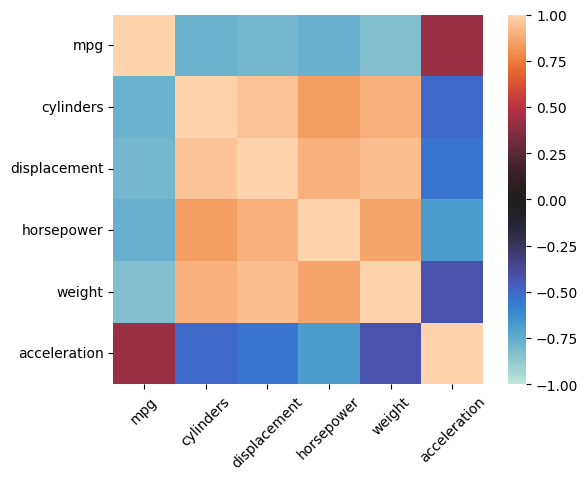

In [79]:
import seaborn as sns
corr = new_df.corr()

ax = sns.heatmap(corr,
                 vmin = -1,
                 vmax = 1,
                 center = 0,
                 square = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


#### Heatmap Interpretation

Color Scale:

The heatmap uses a color scale to represent correlation values:

Dark red (closer to 1): Indicates a strong positive correlation between the variables.

Dark blue (closer to -1): Indicates a strong negative correlation.

Light colors near white (closer to 0): Represent weak or no correlation between the variables.


Diagonal Line:

The diagonal cells from the top-left to the bottom-right (where each variable is compared with itself) all have a value of 1, since a variable is perfectly correlated with itself.

Off-diagonal cells:

These cells show the correlation between different variables. For example:


mpg and weight: The dark blue color shows a strong negative correlation (around -0.83), meaning as car weight increases, miles per gallon (fuel efficiency) tends to decrease.

cylinders and displacement: The light orange color shows a strong positive correlation (close to 0.95), meaning cars with more cylinders tend to have larger engine displacements.

Overall Patterns:

Positive correlations are mostly observed between engine-related features like cylinders, displacement, horsepower, and weight.

Negative correlations are seen between mpg and features like cylinders, horsepower, and weight, indicating that cars with higher engine performance or weight tend to have lower fuel efficiency.